<a href="https://colab.research.google.com/github/sustianovich/pytorch_tutorial/blob/main/pytorch_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Image Classification Linear Regression

In [115]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

from torchvision.datasets import MNIST

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
path_dataset = '/content/drive/MyDrive/Colab Notebooks/Pytorch_tutorial/dataset/'

In [118]:
dataset = MNIST(root=path_dataset, download=True)

In [119]:
len(dataset)

60000

In [120]:
test_dataset = MNIST(root=path_dataset, train=False)
len(test_dataset)

10000

label= 5


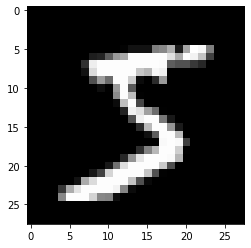

In [121]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('label=', label)

In [122]:
dataset = MNIST(root=path_dataset, train=True, transform=transforms.ToTensor())

In [123]:
len(dataset)

60000

In [124]:
img_tensor, label = dataset[0]
print(img_tensor.shape, 'label=', label)

torch.Size([1, 28, 28]) label= 5


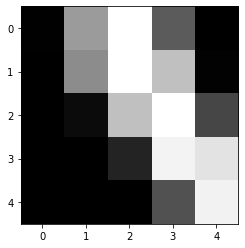

In [125]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [126]:
def split_indices(n, val_pct):
  n_val = int(val_pct * n)
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

In [127]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [128]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [27057  5707 15391 14784 50777 16488 34565 39383 48911 38725 44067 26115
 23616 49780 45827 13216 41408 13892 17363 46394]


In [129]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [130]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 
                          batch_size=batch_size,
                          sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, 
                          batch_size=batch_size,
                          sampler=val_sampler)